In [1]:
using Plots
using DifferentialEquations
using JuliaMBD
using JuliaMBD.Diagram

In [2]:
@model pitch_rate begin
    @parameter begin
        I_ENG2Fr_ENG_mount
        I_ENG2Rr_ENG_mount
        i_center_ENG
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "pitch_rate")
end


pitch_rate (generic function with 1 method)

In [25]:
@model Test_pitch_rate begin
    @parameter begin
        I_ENG2Fr_ENG_mount = 0.1
        I_ENG2Rr_ENG_mount = 0.4
        i_center_ENG = 100
    end
    @block begin
        p = pitch_rate(I_ENG2Fr_ENG_mount=I_ENG2Fr_ENG_mount, I_ENG2Rr_ENG_mount=I_ENG2Rr_ENG_mount, i_center_ENG=i_center_ENG)
        # ramp1 = Ramp(starttime=1, slope=5)
        # ramp2 = Ramp(starttime=10, slope=15)
    end
    @connect begin
        p.out1 => p.in1
        p.out1 => p.in2
    end
    @scope begin
        p.in1 => in1
        p.in2 => in2
        p.out1 => out1
    end
end


Test_pitch_rate (generic function with 1 method)

In [26]:
m = @compile Test_pitch_rate()

JuliaMBD.ODEModel("Block(Test_pitch_rate)", var"#168#170"(), var"#171#172"(), var"#173#174"(), var"#175#180"())

┌ Warning: Automatic dt set the starting dt as NaN, causing instability. Exiting.
└ @ OrdinaryDiffEq /root/.julia/packages/OrdinaryDiffEq/yppG9/src/solve.jl:562
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ SciMLBase /root/.julia/packages/SciMLBase/szsYq/src/integrator_interface.jl:574


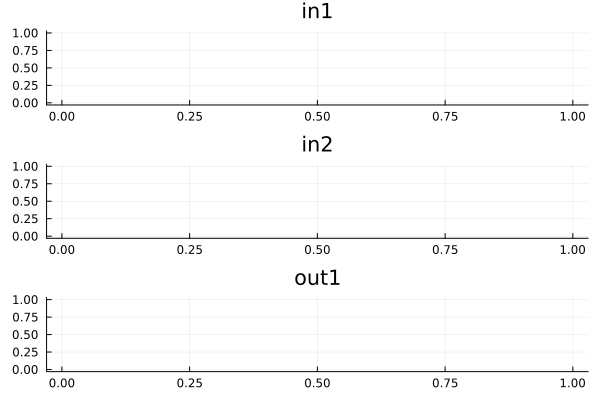

In [27]:
res = simulate(m, tspan=[0, 1])
plot(res)
